author: mkabirov fbertazz

In [0]:
import numpy as np
import matplotlib.pyplot as mplt

# Part 1

Exercise 1. Create a matrix of random values of a distribution of your choice.

In [0]:
num_rows = np.random.randint(1,10)
num_columns = np.random.randint(1,10)
random_matrix = np.random.random((num_rows, num_columns)) 
random_matrix_int = np.random.randint(low=0,high=100,size=(num_rows,num_columns))
print(random_matrix_int)

[[74 29 54 37  0 72 38 61 77]
 [ 0 20 47 52 39 88  9 41 94]
 [90 41  5 74 76 96 90 42 80]
 [15 84 62 70 24 10 58 61 67]]


Exercise 2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.

In [0]:
array_1d = [0,1,2,4,5,6,7,8,9,10,11,12]
array_2d = np.reshape(array_1d, (4, 3))
print(array_2d.shape)
print(array_1d)
print(array_2d)

(4, 3)
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[[ 0  1  2]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


Exercise 3. Write a function that creates an incremental array of dimension (1,n) with values between 0 and 1. Use arr.shape to verify.

In [20]:
def increment_array(n):
  return np.linspace(0,1, n).reshape(1,n)
array_q3 = increment_array(10)
print(array_q3) 

print(array_q3.shape)

[[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]]
(1, 10)


Exercise 4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

In [0]:
matrix_10_12 = np.random.randint(low=0,high=100,size=(10,12))
print(matrix_10_12)
print(" ")
extracted_array = np.ones(16)
index = 0
for i in range(0,4):
  for j in range(8,12):
    extracted_array[index] = matrix_10_12.item(i,j)
    index = index + 1
final_array = np.reshape(extracted_array, (4, 4))
print(final_array)

[[71 86 17 56 90 45 37 69 91 60 52 87]
 [26 43 39 34 82 14 19  9 89 80 71 55]
 [53 15 42 86 52 37 69 88 40 63 73 25]
 [44 21 23 37 34 60  7 86 52 11 44 66]
 [30 10 63 84 33 30 74 12 67 84 78 20]
 [56 20 44 79 47 85 37 24 76 39 59  5]
 [ 2 97 42 21 14 69 38 92 51 54  2 95]
 [38 14 26 17 18 42 65 15 51 98 77 53]
 [77 80 49 87 76 30 25 95 10 94 86 34]
 [ 3 10 90 89  6 71 91 40 36 77 38  1]]
 
[[91. 60. 52. 87.]
 [89. 80. 71. 55.]
 [40. 63. 73. 25.]
 [52. 11. 44. 66.]]


Exercise 5. Using the function in Q3, get m vectors and bind them together (to have a m x n)matrix. Plot the matrix with matplotlib’s imshow.

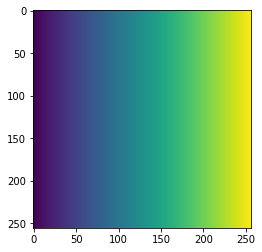

In [21]:
m = 256
n = 256

array_q5 = increment_array(n)
m_n_matrix = np.empty((m, n))
for i in range (0, m):
  for j in range (0, n):
    m_n_matrix[i][j] = array_q5.item(j)
mplt.imshow(m_n_matrix)

Exercise 6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice.
Plot the resulting matrix.

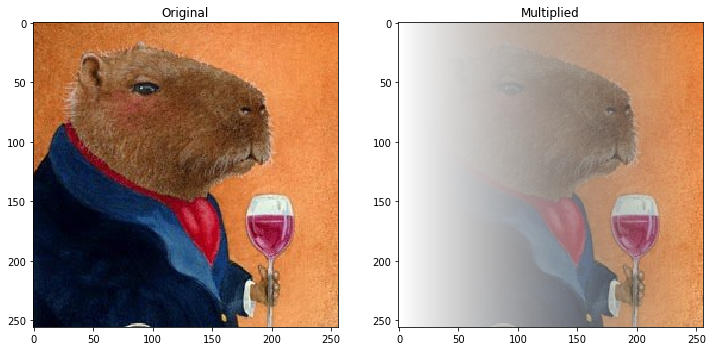

In [22]:
paulinhothe2d = mplt.imread("paulinho.png")

img = np.array(paulinhothe2d)
for i in range(0, 4):
    img[:,:,i] = (img[:,:,i] * m_n_matrix)

f, (left_image, right_image) = mplt.subplots(1, 2, figsize=(12, 8))
left_image.set_title('Original')
left_image.imshow(paulinhothe2d)
right_image.set_title('Multiplied')
right_image.imshow(img)


# Part 2

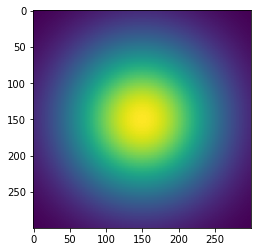

In [23]:
original = mplt.imread("jocker.png")

# Returns array with gaussian distribution
def gaussian_distribution(m, n, amount):
  x, y = np.meshgrid(np.linspace(-1,1,m), np.linspace(-1,1,n))
  d = np.sqrt(x*x+y*y)
  sigma, mu = amount, 0.0
  g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
  return g

# Separates each color channel from img
def getChannels(img):
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    return r, g, b

#Multiplies an channel by value
def applyValue(chan, value):
    chan[:,:] = np.clip((chan[:,:] * value), 0, 1)
    return chan

#Bring back the channels together
def joinChannels(r, g, b):
    return np.stack([r, g, b], axis=2)

mplt.imshow(gaussian_distribution(300, 300, 0.5))

In [0]:
pic = mplt.imread("jocker.png")

def filter(pic, new_r, new_g, new_b ,v):
  img = np.array(pic)
  r, g, b = getChannels(img)
  r = applyValue(r, new_r)
  g = applyValue(g, new_g)
  b = applyValue(b, new_b)
  ret_img = joinChannels(r,g,b);
  if (v > 0):
    dims = pic.shape
    m = dims[0]
    n = dims[1]
    gd = gaussian_distribution(m,n,v)
    for i in range(0, 3):
      ret_img[:,:,i] = (ret_img[:,:,i] * gd)
  return (ret_img)

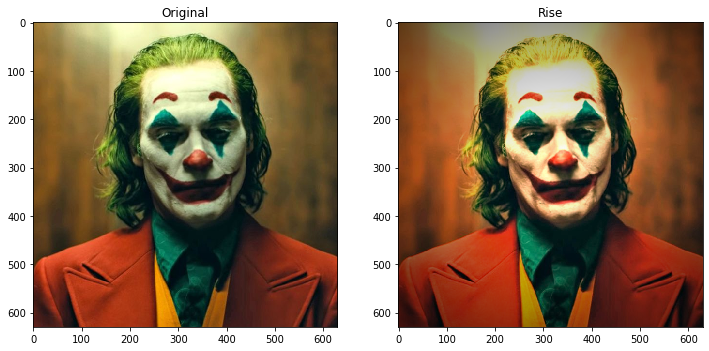

In [29]:
# RISE
# Gives your photos a nice glow and warmth adding yellow tones

f, (left_image, right_image) = mplt.subplots(1, 2, figsize=(12, 8))
left_image.set_title('Original')
left_image.imshow(original)
right_image.set_title('Rise')
right_image.imshow(filter(pic, 1.8666, 1.311, 1.211, 0.99))

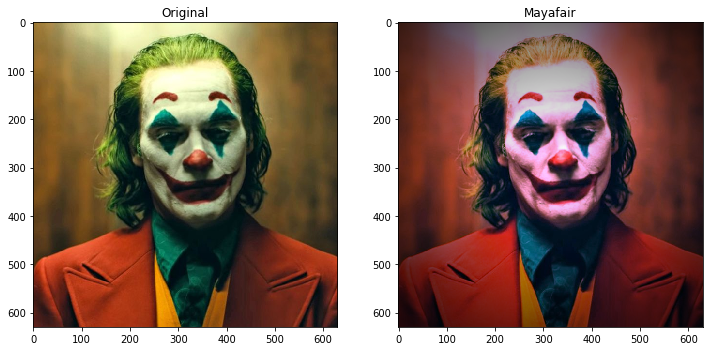

In [30]:
# MAYFAIR
# Adds a warm pinkish tone and subtle vighetting that brightens the center of the photo.

f, (left_image, right_image) = mplt.subplots(1, 2, figsize=(12, 8))
left_image.set_title('Original')
left_image.imshow(original)
right_image.set_title('Mayafair')
right_image.imshow(filter(pic, 1.7, 1, 1.7, 0.8))

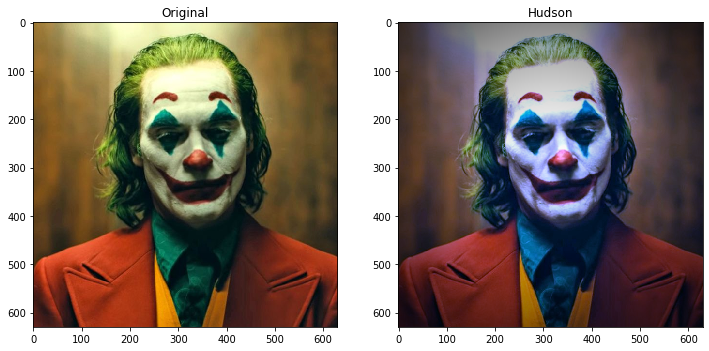

In [31]:
# HUDSON
# Enphasizes light in your image and gives your photos a bluish colder feel.

f, (left_image, right_image) = mplt.subplots(1, 2, figsize=(12, 8))
left_image.set_title('Original')
left_image.imshow(original)
right_image.set_title('Hudson')
right_image.imshow(filter(pic, 1.1, 1.12, 2.3, 0.9))

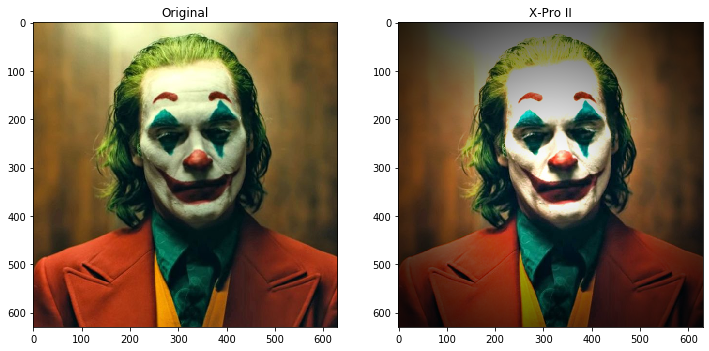

In [32]:
# X-PRO II
# This filter gives your photos a warm vintage feeling and saturated tones

f, (left_image, right_image) = mplt.subplots(1, 2, figsize=(12, 8))
left_image.set_title('Original')
left_image.imshow(original)
right_image.set_title('X-Pro II')
right_image.imshow(filter(pic,1.8, 1.55, 1.7, 0.7))

## Bonus

In [0]:
def reverseValue(chan):
    dim = chan.shape
    m = dim[0]
    n = dim[1]
    rev = np.ones((m,n))
    chan[:,:] = rev[:,:] - chan[:,:]
    return chan

def JockerFilter(pic, new_r, new_g, new_b ,v):
  img = np.array(pic)
  r, g, b = getChannels(img)
  r = applyValue(r, new_r)
  g = applyValue(g, new_g)
  b = applyValue(r, new_b)
  ret_img = joinChannels(r,g,b);
  if (v > 0):
    dims = pic.shape
    m = dims[0]
    n = dims[1]
    gd = gaussian_distribution(m,n,v)
    for i in range(0, 3):
      ret_img[:,:,i] = (ret_img[:,:,i] * gd)
  return (ret_img)

def InvertFilter(pic):
  img = np.array(pic)
  r, g, b = getChannels(img)
  r = reverseValue(r)
  g = reverseValue(g)
  b = reverseValue(b)
  ret_img = joinChannels(r,g,b);
  return (ret_img)

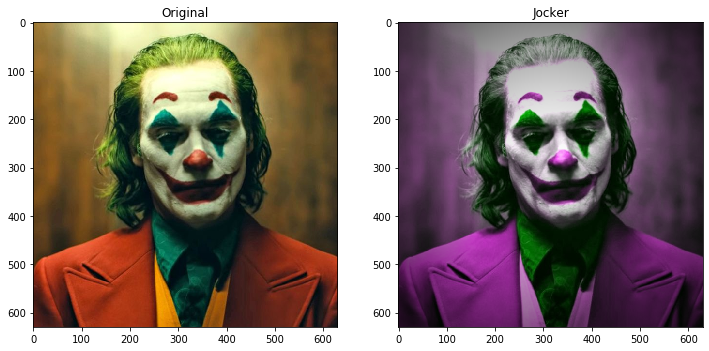

In [39]:
# Jocker Filter
# Adds the original jocker colors from the comic

f, (left_image, right_image) = mplt.subplots(1, 2, figsize=(12, 8))
left_image.set_title('Original')
left_image.imshow(original)
right_image.set_title('Jocker')
right_image.imshow(JockerFilter(pic, 1.1, 1.1, 1.1, 0.9))

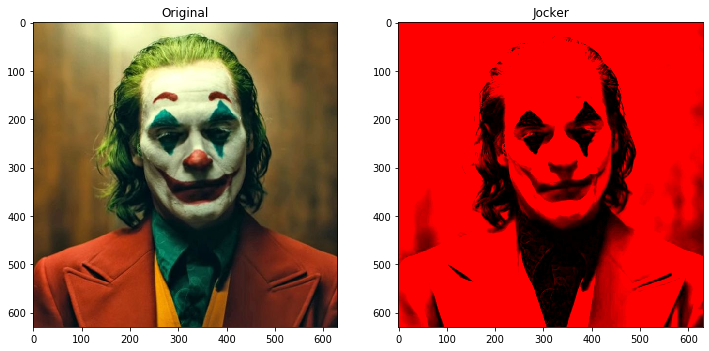

In [34]:
# Psicko
# Bloody high contrast
f, (left_image, right_image) = mplt.subplots(1, 2, figsize=(12, 8))
left_image.set_title('Original')
left_image.imshow(original)
right_image.set_title('Jocker')
right_image.imshow(filter(pic, 3, 0, 0, 0))

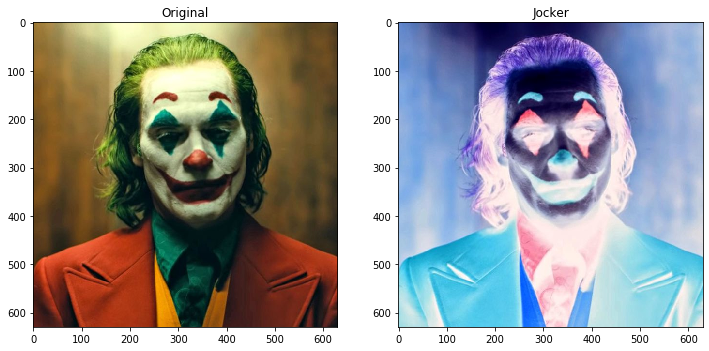

In [40]:
# Ivert
# Invert all the colors
f, (left_image, right_image) = mplt.subplots(1, 2, figsize=(12, 8))
left_image.set_title('Original')
left_image.imshow(original)
right_image.set_title('Jocker')
final = InvertFilter(pic)
#print(final)
right_image.imshow(final)